In [1]:
import numpy as np
import matplotlib.pyplot as plt
import ipywidgets as widgets
import matplotlib
matplotlib.rcParams['animation.embed_limit'] = 2**128

In [2]:
widgets.ColorPicker(
    concise=False,
    description='Pick a color',
    value='blue',
    disabled=False
)

ColorPicker(value='blue', description='Pick a color')

In [3]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import interp1d
from matplotlib import animation
from IPython.display import HTML
from tqdm import tqdm

In [4]:
L_x = 300
g = 9.81

N_x = 1000
dx = L_x/(N_x - 1)
dy = 0.01
dt = 0.05
N_t = 5000
err = 1e-4

x = np.linspace(0,L_x,N_x)
x_todraw = np.pad(x,(20,20),'linear_ramp',end_values=(-20,L_x+20))

In [5]:
x_todraw

array([-20., -19., -18., ..., 318., 319., 320.])

In [6]:
x_todraw.shape

(1040,)

In [7]:
ground = np.where(image==209)
water = np.where(image==150)
water_arr,ground_arr = np.zeros_like(image),np.zeros_like(image)
water_arr[water] = 1
ground_arr[ground] = 1
h_temp = water_arr.sum(axis=0)
z_temp = ground_arr.sum(axis=0)
x_temp = np.linspace(0,L_x,len(h_temp))
f2_h = interp1d(x_temp, h_temp,kind='cubic')
f2_z = interp1d(x_temp, z_temp,kind='cubic')
h = np.array(f2_h(x))*dy
h = np.where(h<err,0,h)
z = np.array(f2_z(x))*dy
z_ = np.zeros_like(z)
u = np.zeros_like(z.copy()) 

NameError: name 'image' is not defined

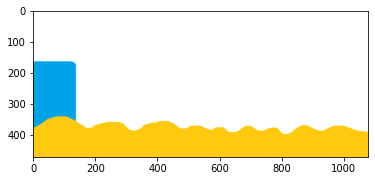

In [8]:
filename ='test_image3.png'
image = cv2.imread(filename,0)
image_color = cv2.imread(filename,1)
b_,g_,r_ = cv2.split(image_color)
image_color2 = cv2.merge([r_,g_,b_])
plt.imshow(image_color2)  

In [9]:
ground = np.where(image==209)
water = np.where(image==150)
water_arr,ground_arr = np.zeros_like(image),np.zeros_like(image)
water_arr[water] = 1
ground_arr[ground] = 1
h_temp = water_arr.sum(axis=0)
z_temp = ground_arr.sum(axis=0)
x_temp = np.linspace(0,L_x,len(h_temp))
f2_h = interp1d(x_temp, h_temp,kind='cubic')
f2_z = interp1d(x_temp, z_temp,kind='cubic')
h = np.array(f2_h(x))*dy
h = np.where(h<err,0,h)
z = np.array(f2_z(x))*dy
z_ = np.zeros_like(z)
u = np.zeros_like(z.copy()) 

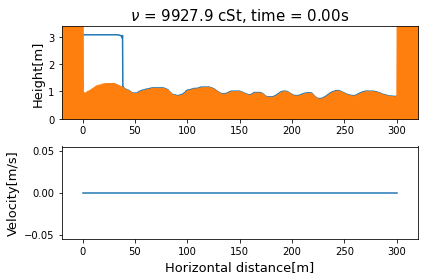

In [10]:
# h = np.ones(N_x)*1
drop = np.exp(-((x-L_x*(0.7))**2/(2*(0.05E+2)**2)))*1.5
h_ = np.max(h+z)
slope = lambda x,b,L: (x>=b)*(x-b)*(L/(L_x-b))
dam  = lambda x,a,b,L: ((x>=a)&(x<=b))*L

s = slope(x,0,1.5)
d = dam(x,20,28,1.6)
z = z 

z_to_draw = np.pad(z,(20, 20),'constant', constant_values=0) + dam(x_todraw,-50,0,h_*1.1)+  dam(x_todraw,L_x,L_x+50,h_*1.1)
z_to_draw2 = np.pad(z,(20, 20),'constant', constant_values=0) + dam(x_todraw,-50,0,h_*1.1)
z_ = np.zeros_like(x_todraw)

maxh = max(h)
kappa = maxh/L_x
cSt = 9927.9
# plt.plot(h)
# plt.show()
# z[150:200]=0
fig, (axh,axu) = plt.subplots(2, 1,facecolor ='white')
line_u,=axu.plot(x,u)
line_h,=axh.plot(x,h+z)
axh.fill_between(x_todraw,z_to_draw,z_,color = 'tab:orange',zorder=2)
axu.set_xlabel('Horizontal distance[m]',fontsize=13)
axh.set_xlim(-20,L_x+20)
axh.set_ylim(-0,h_*1.1)
axh.set_ylabel('Height[m]',fontsize=13)
axu.set_xlim(-20,L_x+20)

axu.set_ylabel('Velocity[m/s]',fontsize=13)
axh.set_title(r'$\nu$ = {} cSt, time = {:.02f}s'.format(cSt,0.),fontsize=15)
plt.tight_layout()

In [11]:
import shallow_water as sw
h_list, u_list,t_list = [],[],[]
t = 0

In [12]:
print(kappa)

0.007070342849638026


In [13]:
0.29*500

145.0

In [14]:

for i in tqdm(range(N_t*100)):
    if t >= 201: 
        print('Time is over 800s, program is end')
        break
    else:
        if i%10 == 0:
            t_list.append(t)
            h_list.append(h)
            u_list.append(u)
        h,u,dt = sw.shallow_water_viscous(h,u.copy(),z,dx,dt,kappa*10,1e-6*cSt,c_num=0.1)
        t += dt
print('last time :',t)

  6%|▌         | 28866/500000 [00:07<02:01, 3864.77it/s]

Time is over 800s, program is end
last time : 201.00775810398997


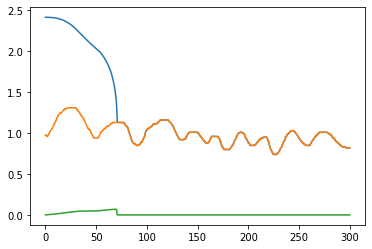

In [15]:
test_num = -1
plt.plot(x,z+h_list[test_num])
plt.plot(x,z)
plt.plot(x,u_list[test_num])

In [16]:
t_ = np.array(t_list)
t_max = np.max(t_)
print(t_max)
t_search = np.arange(0,200,1)
print(len(t_search))
t_ = np.array(t_list)
t_near_indx = np.searchsorted(t_,t_search)


200.9603389394075
200


In [17]:
umin = np.min(u_list)
umin = min(umin*1.1,-0.1)
umax = np.max(u_list)
hzmax = np.max(h_list+z)
t_ = np.array(t_list)
t_near_indx = np.searchsorted(t_,t_search)

axu.set_ylim(umin*1.1,umax*1.1)
# axh.set_ylim(-0.1,3.5)
# axh.fill_between(x,z,z_,color = 'tab:orange',zorder=2)

def update_u_h(num):
    near_num = t_near_indx[num]
    h = h_list[near_num]
    u = u_list[near_num]
    
    # axh.clear()
    axh.set_title(r'$\nu$ = {} cSt, time = {:.02f}s'.format(cSt,t_search[num]),fontsize=15)
    axu.set_ylim(umin,np.max(u)*1.5)
    line_u.set_data(x,u)
    line_h.set_data(x,h+z)
    # axh.fill_between(x,h+z,z)
    

In [18]:
animh = animation.FuncAnimation(fig, update_u_h,
        frames = len(t_search), interval = 20, blit = False)
# plt.show()

In [19]:
HTML(animh.to_jshtml())
# 꿀의 경우 long time 은 평소에 보여주던 것의 500배,
# 1000 cSt의 경우 50배의 속도로 보여주었음
# 물의 경우 긴 경향을 볼떄는 평소의 10배

In [20]:
animh.save(f'예비용/test3 nu ={cSt}cSt,c_num = 0.01.mp4',dpi=400)

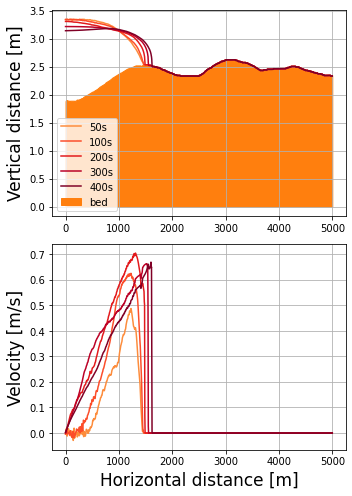

In [ ]:
plt.figure(figsize=(5,7))
plt.subplot(211)
plt.grid()
plt.fill_between(x,z,z_,color= 'tab:orange',label='bed')
plt.subplot(212)
plt.grid()

# plt.suptitle(r'water $\nu$ = 1 cSt',fontsize=20)
time_stamp = [50,100,200,300,400]
int_ =np.linspace(0.5,1,len(time_stamp))
color = plt.cm.YlOrRd(int_)
for i_,s in enumerate(time_stamp):
    sec = np.searchsorted(t_,s)
    num= sec
    hz = h_list[num] +z
    plt.subplot(211)
    plt.plot(x,hz,label=f'{s}s',color=color[i_])
    # plt.fill_between(x,hz,z,label=f'{s}s',color=color[i_],alpha =0.2)
    # plt.xlabel('horizontal distance [m]',fontsize = 13)
    plt.ylabel('Vertical distance [m]',fontsize = 17)
    # plt.grid()

    plt.subplot(212)
    plt.plot(x,u_list[num],color=color[i_])
    # plt.fill_between(x,z,z_)
    # plt.suptitle(f'time = {t_[num]:.02f}s',fontsize=15)
    plt.xlabel('Horizontal distance [m]',fontsize = 17)
    plt.ylabel('Velocity [m/s]',fontsize = 17)
    # plt.ylim(-0.1,30)
    # plt.grid()
plt.subplot(211)
plt.legend()

plt.tight_layout()
# plt.savefig(f'ppt용/NEW Total u and h, nu = {cSt}cSt,kappa = {kappa}.png',dpi= 400)


# plt.plot(x,u_list[num])
# num = num+400